<a href="https://colab.research.google.com/github/javierber/projects-repo/blob/main/Data_Visualization_Exercise_(Core)_Girls_Participation_in_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Visualization Exercise (Core)
Makeover Monday offers a weekly challenge to re-create or improve data visualizations. Your task is to choose one of the data visualizations to re-create or improve!

To do this:

Choose a data set from the Data Sets list. You can choose a recent data set or one from a previous year - as long as it interests you!
Download the data that you chose.
Use Python to create a visually appealing, informative visualization using the data you selected.
You also need to put your work for this assignment on GitHub, so everyone can see the awesome visualization you created!

To do this:

Create a new GitHub repository with an informative name for your visualization or data. (Note: here are instructions on how to do this if you are unsure - make sure to check the box marked "Initialize this repository with a README.")
Add your code to the GitHub repo you created. You can do this in Google Colab by selecting File > "Save a Copy In GitHub"
Edit the README to create an informative overview of the exercise that explains the purpose of the task/visualization, the data, and what the visualization you made shows/tells you. You may even want to include a static image of your final visualization in the README as well! (Note: README's are markdown files. Here is a cheatsheet of markdown syntax.) Try to make this as informative and professional as possible, as this is the first thing people will see when they come to your GitHub repo!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file = '/content/drive/MyDrive/Colab Notebooks/partcipation_statistics_06_14_2020 10_22.xlsx'
df = pd.read_excel(file, header =0)
df.head()

,Year,State,Sport,Boys School,Girls School,Boys Participation,Girls Participation
0,2018/2019,AL,Adapted Basketball,0.0,0.0,0.0,0.0
1,2018/2019,AL,Adapted Bocce - Indoor,0.0,0.0,0.0,0.0
2,2018/2019,AL,Adapted Bowling,0.0,0.0,0.0,0.0
3,2018/2019,AL,Adapted Floor Hockey,0.0,0.0,0.0,0.0
4,2018/2019,AL,Adapted Soccer,0.0,0.0,0.0,0.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df.tail(5)

,Year,State,Sport,Boys School,Girls School,Boys Participation,Girls Participation
55130,2002/2003,WY,Track and Field -- Outdoor,70.0,69.0,1482.0,1379.0
55131,2002/2003,WY,Volleyball,0.0,66.0,0.0,1713.0
55132,2002/2003,WY,Water Polo,0.0,0.0,0.0,0.0
55133,2002/2003,WY,Weight Lifting,0.0,0.0,0.0,0.0
55134,2002/2003,WY,Wrestling,60.0,0.0,1054.0,0.0


In [5]:
#get the size of the datafram
print("Rows          : ", df.shape[0]) #get the number of rows/observation
print("Columns       : ", df.shape[1]) #get the number of columns/observation
print("#"*40, "\n", "Features : \n\n",  df.columns.tolist()) #get name of columns/features
print("#"*40, "\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print("#"*40, "\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) #looking at columsn with most missing values
print("#"*40, "\nUnique values  :\n\n", df.nunique()) #count of unique values

Rows          :  55135
Columns       :  7
######################################## 
 Features : 

 ['Year', 'State', 'Sport', 'Boys School', 'Girls School', 'Boys Participation', 'Girls Participation']
######################################## 
Missing values :

 Girls School           10
Girls Participation     6
Boys School             5
Boys Participation      3
State                   1
Sport                   0
Year                    0
dtype: int64
######################################## 
Percent of missing :

 Year                   0.00
State                  0.00
Sport                  0.00
Boys School            0.01
Girls School           0.02
Boys Participation     0.01
Girls Participation    0.01
dtype: float64
######################################## 
Unique values  :

 Year                     17
State                    51
Sport                    96
Boys School             936
Girls School            929
Boys Participation     6912
Girls Participation    6259
dtype: in

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55135 entries, 0 to 55134
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 55135 non-null  object 
 1   State                55134 non-null  object 
 2   Sport                55135 non-null  object 
 3   Boys School          55130 non-null  float64
 4   Girls School         55125 non-null  float64
 5   Boys Participation   55132 non-null  float64
 6   Girls Participation  55129 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.9+ MB


In [7]:
df.duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)

In [8]:
print(df.isnull().sum())

Year                    0
State                   1
Sport                   0
Boys School             5
Girls School           10
Boys Participation      3
Girls Participation     6
dtype: int64


In [9]:
df[df['Girls School'].isnull()]

,Year,State,Sport,Boys School,Girls School,Boys Participation,Girls Participation
5904,2017/2018,LA,Football -- 11-Player,299.0,NaN,19690.0,NaN
6902,2017/2018,NJ,Baseball,392.0,NaN,15103.0,21.0
7315,2017/2018,OH,Adapted Soccer,0.0,NaN,47.0,47.0
7316,2017/2018,OH,Adapted Softball,0.0,NaN,96.0,172.0
9308,2016/2017,DC,Skiing -- Alpine,NaN,NaN,NaN,NaN
15367,2015/2016,NC,Field Hockey,0.0,NaN,0.0,NaN
15375,2015/2016,NC,Gymnastics,0.0,NaN,0.0,NaN
16493,2015/2016,WV,Golf,89.0,NaN,917.0,NaN
47911,2004/2005,IN,Archery,NaN,NaN,NaN,NaN
49367,2004/2005,TN,Archery,0.0,NaN,0.0,0.0


In [10]:
df['Girls Participation'] = df['Girls Participation'].fillna(0)
df['Girls School'] = df['Girls School'].fillna(0)
print(df.isnull().sum())

Year                   0
State                  1
Sport                  0
Boys School            5
Girls School           0
Boys Participation     3
Girls Participation    0
dtype: int64


In [11]:
#Check to see whats before or after
print(df[49820:49840])

            Year State  ... Boys Participation  Girls Participation
49820  2004/2005    WY  ...                0.0                  0.0
49821  2004/2005    WY  ...              381.0                603.0
49822  2004/2005    WY  ...                0.0                  0.0
49823  2004/2005    WY  ...                0.0                  0.0
49824  2004/2005    WY  ...              240.0                290.0
49825  2004/2005    WY  ...              283.0                290.0
49826  2004/2005    WY  ...             1590.0               1317.0
49827  2004/2005    WY  ...                0.0               1789.0
49828  2004/2005    WY  ...                0.0                  0.0
49829  2004/2005    WY  ...                0.0                  0.0
49830  2004/2005    WY  ...             1112.0                  5.0
49831  2004/2005   NaN  ...                0.0                  0.0
49832  2003/2004    AL  ...                0.0                  0.0
49833  2003/2004    AL  ...                0.0  

In [12]:
df['State'].fillna('WY', inplace=True)
df[df['State'].isnull()]

,Year,State,Sport,Boys School,Girls School,Boys Participation,Girls Participation


In [13]:
#Cleanup the remaining NaN to 0
df.fillna(0)


,Year,State,Sport,Boys School,Girls School,Boys Participation,Girls Participation
0,2018/2019,AL,Adapted Basketball,0.0,0.0,0.0,0.0
1,2018/2019,AL,Adapted Bocce - Indoor,0.0,0.0,0.0,0.0
2,2018/2019,AL,Adapted Bowling,0.0,0.0,0.0,0.0
3,2018/2019,AL,Adapted Floor Hockey,0.0,0.0,0.0,0.0
4,2018/2019,AL,Adapted Soccer,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
55130,2002/2003,WY,Track and Field -- Outdoor,70.0,69.0,1482.0,1379.0
55131,2002/2003,WY,Volleyball,0.0,66.0,0.0,1713.0
55132,2002/2003,WY,Water Polo,0.0,0.0,0.0,0.0
55133,2002/2003,WY,Weight Lifting,0.0,0.0,0.0,0.0


In [14]:
df.drop(columns=['Boys School', 'Boys Participation'], inplace=True)

In [15]:
df['Sport'].unique()

array(['Adapted Basketball', 'Adapted Bocce - Indoor', 'Adapted Bowling',
       'Adapted Floor Hockey', 'Adapted Soccer', 'Adapted Softball',
       'Adapted Track', 'Adapted Volleyball', 'Adaptive Corn Toss',
       'Adaptive Golf', 'Adaptive Handball', 'Adaptive Strength Training',
       'Adaptive Tennis', 'Air Riflery', 'Archery', 'Badminton',
       'Baseball', 'Basketball', 'Bass Fishing', 'Beach Volleyball',
       'Bocce - Outdoor', 'Bowling', 'Canoe Paddling',
       'Competitive Spirit* (Boys who cheer/Girls who cheer)', 'Crew',
       'Cross Country', 'Cycling', 'Dance', 'Dance/Drill',
       'Dance Team, High Kick', 'Dance Team, Jazz', 'Decathlon',
       'Drill Team', 'Equestrian', 'Fencing', 'Field Hockey',
       'Figure Skating', 'Flag Football', 'Football -- 11-Player',
       'Football -- 6-player', 'Football -- 8-player',
       'Football -- 9-player', 'Golf', 'Gymnastics', 'Heptathlon',
       'Ice Hockey', 'Judo', 'Kayaking', 'Lacrosse', 'Martial Arts',
       'Mi

In [16]:
df['Sport'].replace(to_replace={'Competitive Spirit* (Boys who cheer/Girls who cheer)': 'Competitive Cheer'}, inplace=True)

In [17]:
categorical_data = df.select_dtypes(include=[np.object])
numerical_data = df.select_dtypes(include=[np.number])


print(categorical_data.dtypes)
print("#"*40)
print(numerical_data.dtypes)

Year     object
State    object
Sport    object
dtype: object
########################################
Girls School           float64
Girls Participation    float64
dtype: object


In [18]:
df['New_Year'] = df['Year'].str[:4]
df.head()

,Year,State,Sport,Girls School,Girls Participation,New_Year
0,2018/2019,AL,Adapted Basketball,0.0,0.0,2018
1,2018/2019,AL,Adapted Bocce - Indoor,0.0,0.0,2018
2,2018/2019,AL,Adapted Bowling,0.0,0.0,2018
3,2018/2019,AL,Adapted Floor Hockey,0.0,0.0,2018
4,2018/2019,AL,Adapted Soccer,0.0,0.0,2018


In [19]:
df.sort_values(by=['New_Year'])
pd.to_datetime(df.New_Year, format='%Y')
df['New_Year'].dtypes

dtype('O')

In [20]:
print("Rows          : ", df.shape[0]) #get the number of rows/observation
print("Columns       : ", df.shape[1]) #get the number of columns/observation
print("#"*40, "\n", "Features : \n\n",  df.columns.tolist()) #get name of columns/features
print("#"*40, "\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print("#"*40, "\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) #looking at columsn with most missing values
print("#"*40, "\nUnique values  :\n\n", df.nunique()) #count of unique values

Rows          :  55135
Columns       :  6
######################################## 
 Features : 

 ['Year', 'State', 'Sport', 'Girls School', 'Girls Participation', 'New_Year']
######################################## 
Missing values :

 New_Year               0
Girls Participation    0
Girls School           0
Sport                  0
State                  0
Year                   0
dtype: int64
######################################## 
Percent of missing :

 Year                   0.0
State                  0.0
Sport                  0.0
Girls School           0.0
Girls Participation    0.0
New_Year               0.0
dtype: float64
######################################## 
Unique values  :

 Year                     17
State                    51
Sport                    96
Girls School            929
Girls Participation    6259
New_Year                 17
dtype: int64


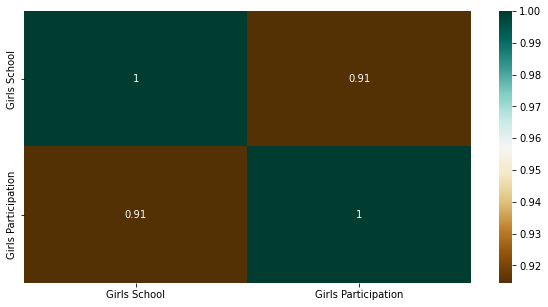

In [21]:
plt.figure(figsize=(10,5))
corr= df.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

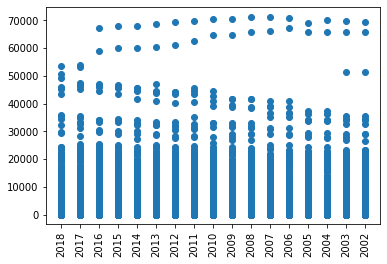

In [22]:
df.sort_values(by=['New_Year'])
plt.figure
plt.scatter(x='New_Year', y='Girls Participation', data=df)
plt.xticks(rotation=90)


14997

<Figure size 720x432 with 0 Axes>

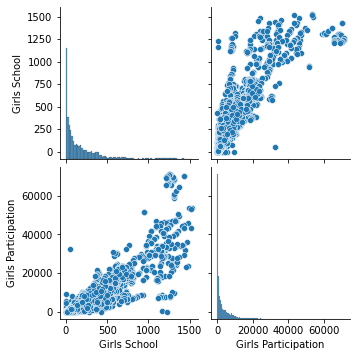

In [23]:
girls_parti = df[df['Girls Participation'] >= 1]
plt.figure(figsize=(10,6))
sns.pairplot(girls_parti);
girls_parti.value_counts().sum()

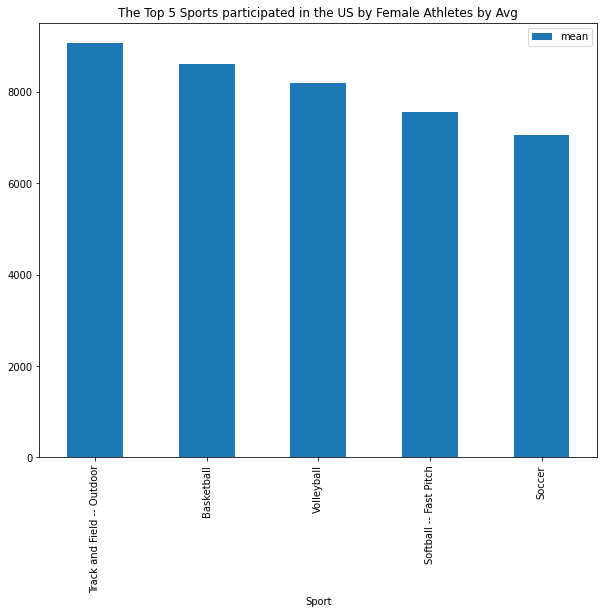

In [78]:
girls_parti = df[df['Girls Participation'] >= 1]
girls_sportpart = girls_parti.groupby(['Sport'])['Girls Participation'].agg(['mean'])
top5sports_girls = girls_sportpart.dropna().sort_values('mean', ascending=False)[:5]
top5sports_girls.plot(kind='bar', figsize=(10,8))
plt.title('The Top 5 Sports participated in the US by Female Athletes by Avg');
fig.savefig('/content/drive/MyDrive/Colab Notebooks/graphs_colab/Top5_avg3.png')

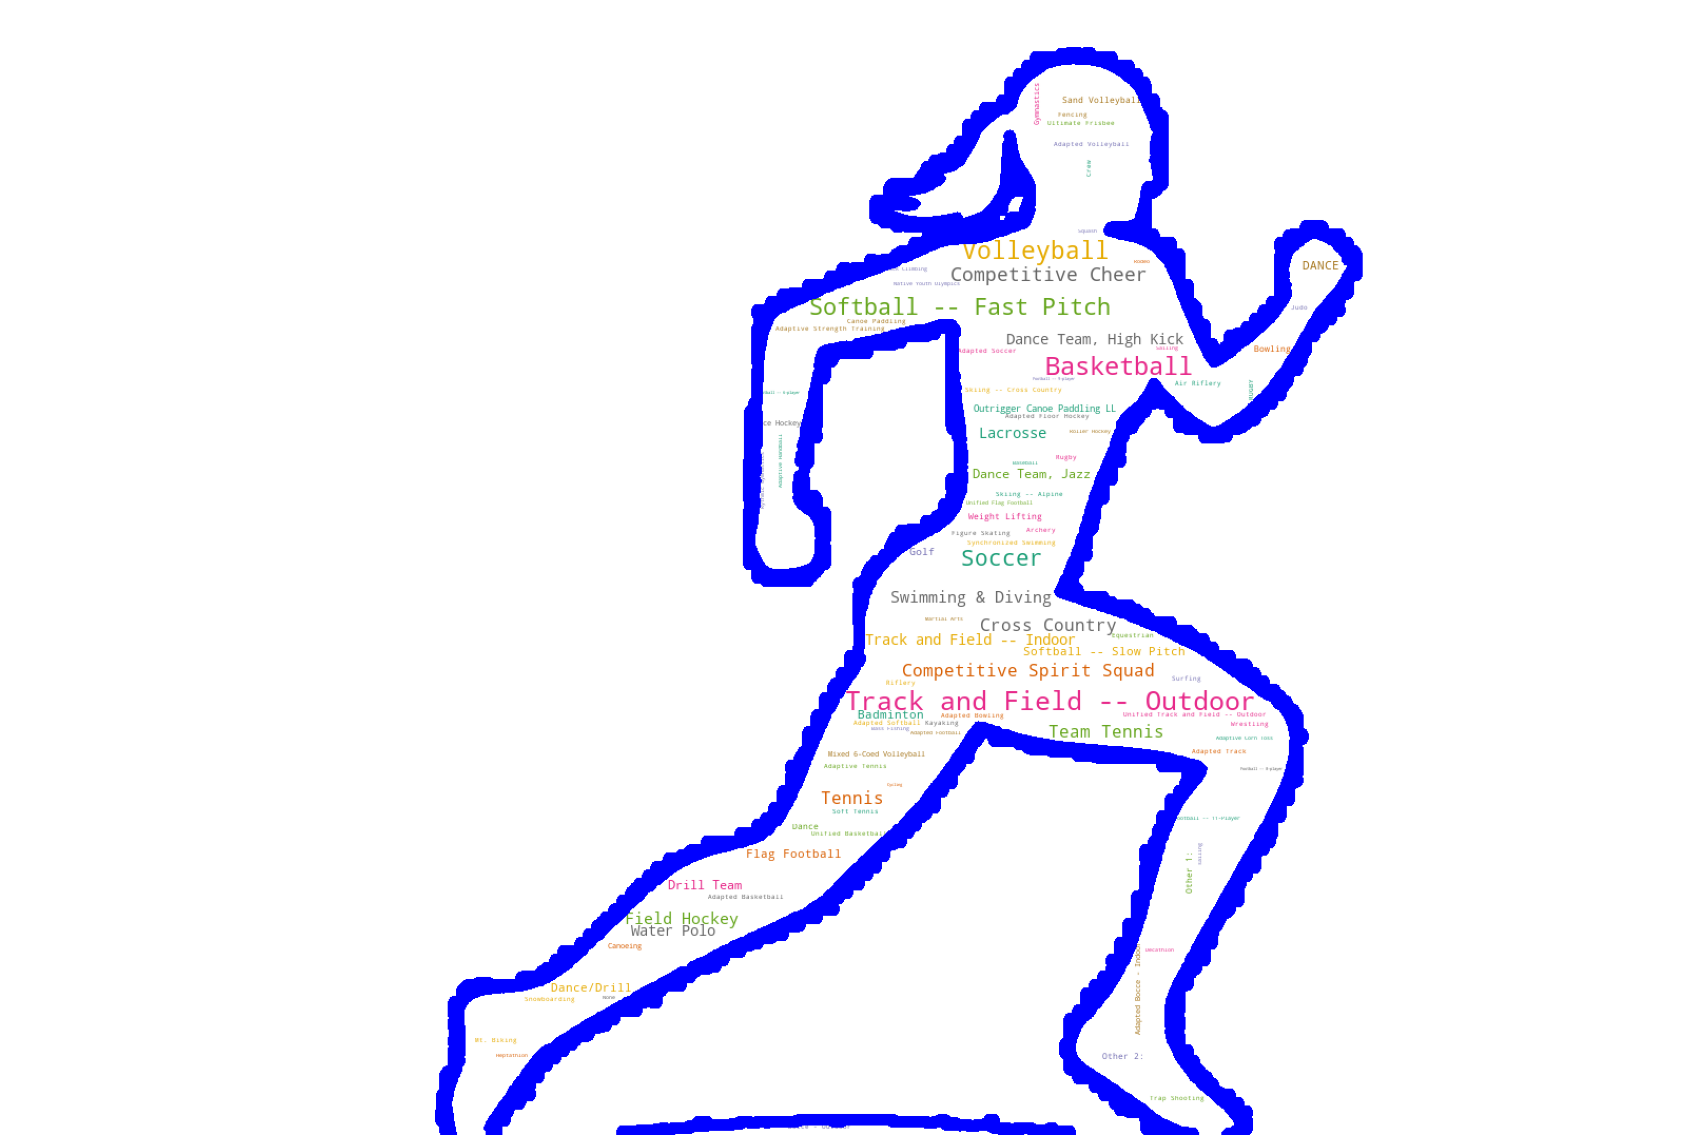

In [71]:
#import
#source: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#Build Word dictionary
sports_all = girls_parti.groupby(['Sport'])['Girls Participation'].mean().to_dict()

# Import image to np.array
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/runner.jpg'))

# Dict List
text2=sports_all

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
wc = WordCloud(background_color='white',width=3000,height=2000, stopwords = STOPWORDS, colormap='Dark2', contour_color='blue',contour_width=20, random_state=1,collocations=False, mask=mask).generate_from_frequencies(text2)

# Display the generated image:
plt.figure(figsize=(30,30))
plt.axis("off")
plt.imshow(wc);
fig.savefig('saved_figure.png');
